# EXPLORING DATA
---

Nhiệm vụ của phần này là tổng hợp, làm sạch và phân tích dữ liệu đã được thu thập

## IMPORT

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## TỔNG HỢP DỮ LIỆU

### 1. Đọc dữ liệu

In [ ]:
# Đọc dữ liệu từ 3 tệp
data_1 = pd.read_csv('../IntroToDS/Data/movie_data_part1.csv')
data_2 = pd.read_csv('../IntroToDS/Data/movie_data_part2.csv')
data_3 = pd.read_csv('../IntroToDS/Data/movie_data_part3.csv')

### 2. Kiểm tra trước khi tổng hợp
Kiểm tra xem cả 3 tệp có giống nhau về đặc trưng hay không

In [239]:
# Hàm kiểm tra xem các tệp có giống nhau về đặc trưng
def check_feature_similarity(df1, df2, df3):
    columns_1 = df1.columns.tolist()
    columns_2 = df2.columns.tolist()
    columns_3 = df3.columns.tolist()

    if columns_1 == columns_2 == columns_3:
        print("The features are identical")
    else:
        print("The features are not identical:")
        if columns_1 != columns_2:
            print(f"- File 1 and File 2")
            print(set(columns_1).symmetric_difference(columns_2))
        if columns_2 != columns_3:
            print(f"- File 2 and File 3")
            print(set(columns_2).symmetric_difference(columns_3))
        if columns_1 != columns_3:
            print(f"- File 3 and File 1")
            print(set(columns_3).symmetric_difference(columns_1))

In [240]:
# TEST
check_feature_similarity(data_1, data_2, data_3)

The features are not identical:
- File 2 and File 3
{'Unnamed: 0'}
- File 3 and File 1
{'Unnamed: 0'}


Cột không có tên nằm trong tệp 1 và tệp 2 chỉ là cột số thứ tự của các dòng dữ liệu, ta có thể loại bỏ

In [241]:
data_1 = data_1.iloc[:, 1:]
data_2 = data_2.iloc[:, 1:]

In [242]:
# TEST
check_feature_similarity(data_1, data_2, data_3)

The features are identical


Các đặc trưng của dữ liệu trong 3 tệp đã khớp với nhau

### 3. Tổng hợp các tệp

In [243]:
data = pd.concat([data_1, data_2, data_3], ignore_index=True)

Biến data chứa dữ liệu sau khi tổng hợp

In [244]:
data.head()

,Title,Release time,Age rating,Runtime,Genre,Lanuage,Awards,Metascore,IMDb Rating,IMDb Votes,Domestic Revenue
0,Goon Squad,18 Jan 2024,NC-17,1h 23min,Crime,English,NaN,NaN,NaN,NaN,NaN
1,The Phantom Warrior,20 Feb 2024,R,1h 23min,"Adventure, Fantasy, Sci-Fi",English,NaN,NaN,2.60,532,NaN
2,Beyond the Lake,26 Jan 2024,G,1h 38min,Comedy,English,NaN,NaN,NaN,31,NaN
3,Crimes of Fashion: Killer Clutch,15 Mar 2024,PG,1h 24min,"Crime, Drama, Mystery","English, French",NaN,NaN,5.80,503,NaN
4,Love on the Danube: Love Song,10 Sep 2024,G,1h 24min,Romance,English,NaN,NaN,5.80,175,NaN


## LÀM SẠCH VÀ PHÂN TÍCH DỮ LIỆU

### 1. Dữ liệu có bao nhiêu dòng, cột

In [245]:
data.shape

(1796, 11)

### 2. Thông tin về các dòng dữ liệu

#### 2.1 Ý nghĩa từng dòng dữ liệu

- Mỗi dòng là đại diện cho một bộ phim, cung cấp thông tin về tên, thời gian phát hành, thể loại, ngôn ngữ, đánh giá, doanh thu và các thông tin khác liên quan đến bộ phim đó. 

- Không có dòng nào có ý nghĩa khác với các dòng còn lại.

#### 2.2 Kiểm tra các dòng dữ liệu trùng lặp

In [246]:
n_duplicate = data.duplicated().sum()
n_duplicate

27

Xử lý các đữ liệu trùng lặp

In [247]:
if n_duplicate > 0:
    data = data.drop_duplicates()

data.shape

(1769, 11)

### 3. Thông tin về các cột dữ liệu
Dữ liệu có các cột sau

In [248]:
data.columns

Index(['Title', 'Release time', 'Age rating', 'Runtime', 'Genre', 'Lanuage',
       'Awards', 'Metascore', 'IMDb Rating', 'IMDb Votes', 'Domestic Revenue'],
      dtype='object')

Có một tên cột bị sai chính tả, sửa lại cho đúng

In [249]:
data = data.rename(columns={'Lanuage': 'Language'})

### 3.1 Ý nghĩa của các cột dữ liệu

Mỗi cột có ý nghĩa sau: 
|Tên cột|Ý nghĩa|
|-------|-------|
| Title| Tên của bộ phim|
| Realease time| Thời gian phát hành của bộ phim|
| Age rating| Đánh giá độ tuổi phù hợp để xem phim|
| Runtime| Thời lượng của bộ phim|
| Genre| Thể loại của bộ phim|
| Language| Ngôn ngữ chính được sử dụng trong bộ phim|
| Awards| Số lượng hoặc tên giải thưởng mà bộ phim nhận được (nếu có)|
| Metascore| Điểm đánh giá từ Metacritic|
| IMDb Rating| Điểm đánh giá của bộ phim trên IMDb|
| IMDb Votes| Số lượt bình chọn của người dùng trên IMDb|
| Domestic Revenue|Doanh thu nội địa|

Trong cột Age rating có các giá trị sau NC-17, R, PG-13, PG, G có ý nghĩa là:
- NC-17: Phim dành cho khán giả từ 17 tuổi trở lên, nội dung mạnh mẽ, chứa nhiều yếu tố gây ảnh hưởng xấu đến nhân cách, đạo đức, khuyến khích hành vi phạm tội
- R: Phim chỉ dành cho khán giả từ 17 tuổi trở lên nhưng không nghiêm trọng để đạt xếp loại NC-17
- PG-13: Phim dành cho khán giả trên 13 tuổi
- PG: Phim có thể xem cho mọi lứa tuổi, nhưng có thể chứa một số cảnh hoặc chủ đề cần lưu ý đối với trẻ nhỏ.
- G: Phim dành cho tất cả mọi lứa tuổi

### 3.2 Kiểm tra kiểu dữ liệu của mỗi cột
Kiểu dữ liệu hiện tại của các cột

In [250]:
data.dtypes

Title                object
Release time         object
Age rating           object
Runtime              object
Genre                object
Language             object
Awards               object
Metascore           float64
IMDb Rating         float64
IMDb Votes           object
Domestic Revenue     object
dtype: object

Có một số cột dữ liệu chưa được xác định với các kiểu dữ liệu phù hợp.

- Ta chuyển cột **Release time** qua kiểu dữ liệu date time

- Ta chuyển các cột **Runtime, IMDb Votes, Domestic Revenue** từ định tính qua định lượng

- Cột **Genre** sẽ được tách ra nhiều đặc trưng tương ứng với từng thể loại

- Cột **Awards** sẽ được tách ra thành 2 cột là **Win** và **Nomination** để phân biệt phim nào được đạt giải và được đề cử 


##### Release time

In [251]:
data['Release time'] = pd.to_datetime(data['Release time'], errors='coerce')

##### Runtime

In [252]:
def convert_runtime_to_minutes(runtime):
    try:
        if 'h' in runtime and 'min' in runtime:  # Có cả giờ và phút
            parts = runtime.split('h')
            hours = int(parts[0].strip())  # Phần trước 'h' là số giờ
            minutes = int(parts[1].replace('min', '').strip())  # Phần sau 'h' là số phút
            return hours * 60 + minutes
        elif 'min' in runtime:  # Chỉ có phút
            minutes = int(runtime.replace('min', '').strip())
            return minutes
        elif 'h' in runtime:  # Chỉ có giờ
            hours = int(runtime.replace('h', '').strip())
            return hours * 60
        else:
            return None  # Nếu không đúng định dạng
    except (ValueError, AttributeError):
        return None  # Xử lý ngoại lệ nếu giá trị không hợp lệ


In [253]:
data['Runtime'] = data['Runtime'].dropna().apply(convert_runtime_to_minutes)

##### Genre
Ta sẽ tách cột Genre thành nhiều cột tương ứng với từng thể loại, giá trị trong cột sẽ là 0 hoặc 1, trước hết xem xét trong dữ liệu có bao nhiêu thể loại

In [254]:
unique_genres = set(genre for row in data['Genre'].dropna() for genre in row.split(', '))
print(unique_genres)

{'Adventure', 'Action', 'Fantasy', 'Documentary', 'Family', 'Drama', 'Horror', 'Sci-Fi', 'Mystery & Thriller', 'Animation', 'Western', 'Mystery', 'Thriller', 'Action & Adventure', 'War', 'News', 'Kids & Family', 'Reality-TV', 'History', 'Game-Show', 'Short', 'Comedy', 'Musical', 'Talk-Show', 'Romance', 'Biography', 'Crime', 'Sport', 'Music'}


Vì có quá nhiều thể loại nên ta sẽ nhóm chúng thành từng nhóm

In [255]:
# Hàm nhóm các thể loại
def group_genres(genre):
    genre_mapping = {
        'Game-show': 'Game-show',
        'Action': 'Action/Adventure',
        'Adventure': 'Action/Adventure',
        'Action & Adventure': 'Action/Adventure',
        'Horror': 'Horror/Thriller/Mystery',
        'Thriller': 'Horror/Thriller/Mystery',
        'Mystery & Thriller': 'Horror/Thriller/Mystery',
        'Mystery': 'Horror/Thriller/Mystery',
        'Documentary': 'Docummentary',
        'Biography': 'Biography/History/War',
        'History': 'Biography/History/War',
        'War': 'Biography/History/War',
        'Comedy': 'Comedy',
        'Drama': 'Drama',
        'Fantasy': 'Fantasy/Sci-Fi',
        'Sci-Fi': 'Fantasy/Sci-Fi',
        'News': 'News',
        'Musical': 'Music/Musical',
        'Music': 'Music/Musical',
        'Animation': 'Animation',
        'Family': 'Kids/Family',
        'Kids & Family': 'Kids/Family',
        'Western': 'Western',
        'Sport': 'Sport',
        'Reality-TV': 'Reality-TV',
        'Romance': 'Romance',
        'Talk-Show': 'Talk-Show',
        'Crime': 'Crime',
        'Short': 'Short'
    }
    return genre_mapping.get(genre, genre)

In [256]:
# Gộp từng thể loại trong danh sách genre
data['Genre'] = data['Genre'].apply(
    lambda x: ', '.join([group_genres(g) for g in x.split(', ')]) if pd.notnull(x) else ''
)

Những thể loại không phổ biến ta sẽ chuyển thành other

In [257]:
# Đếm tần suất sau khi nhóm
grouped_genre_counts = data['Genre'].str.split(', ').explode().value_counts()
grouped_genre_counts

Genre
Horror/Thriller/Mystery    629
Drama                      570
Comedy                     472
Action/Adventure           458
Docummentary               298
Romance                    224
Crime                      178
Biography/History/War      153
Fantasy/Sci-Fi             120
Animation                  113
Kids/Family                 79
Music/Musical               60
Sport                       43
Short                       32
Western                     17
Reality-TV                   5
Game-Show                    3
Talk-Show                    2
News                         2
Name: count, dtype: int64

In [258]:
# Chỉ giữ lại thể loại phổ biến
# Tìm các thể loại có tần suất < 50
low_frequency_genres = set(grouped_genre_counts[grouped_genre_counts < 50].index)

# Thay thế thể loại không phổ biến bằng "Other"
data['Genre'] = data['Genre'].apply(
    lambda x: ', '.join(
        [genre if genre not in low_frequency_genres else 'Other' for genre in x.split(', ')]
    ) if pd.notnull(x) else ''
)

Ta tách cột Genre thành các cột thể loại tương ứng

In [259]:
# Sử dụng one-hot encoding để tách thành nhiều cột
genre_dummies = data['Genre'].str.get_dummies(sep=', ')

# Gắn các cột mới vào DataFrame ban đầu
data = pd.concat([data, genre_dummies], axis=1)

# Xóa cột Genre
data.drop(columns=['Genre'], inplace=True)

##### Awards

Ta tách cột Awards thành 2 cột riêng là Win và Nomination

In [260]:
# Tách cột Award thành 2 cột Win và Nomination
data[['Win', 'Nomination']] = data['Awards'].str.extract(r'(\d+)\s+win.*&\s+(\d+)\s+nomination')

# Chuyển dữ liệu trong các cột Win và Nomination thành kiểu số
data['Win'] = pd.to_numeric(data['Win'], errors='coerce')  # Coerce chuyển giá trị không thể chuyển thành NaN
data['Win'] = data['Win'].fillna(0)
data['Nomination'] = pd.to_numeric(data['Nomination'], errors='coerce')
data['Nomination'] = data['Nomination'].fillna(0)
# Xóa cột Awards
data = data.drop(columns=['Awards'])    

##### IMDb Votes

In [261]:
data['IMDb Votes'] = data['IMDb Votes'].replace({',': ''}, regex=True)
data['IMDb Votes'] = data['IMDb Votes'].dropna().astype(float)

##### Domestic Revenue


In [262]:
data['Domestic Revenue'] = data['Domestic Revenue'].replace({'\$': '', ',': ''}, regex=True)
data['Domestic Revenue'] = data['Domestic Revenue'].dropna().astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_17148/2253550822.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['Domestic Revenue'] = data['Domestic Revenue'].replace({'\$': '', ',': ''}, regex=True)


Kiểm tra lại

In [263]:
data.dtypes

Title                              object
Release time               datetime64[ns]
Age rating                         object
Runtime                           float64
Language                           object
Metascore                         float64
IMDb Rating                       float64
IMDb Votes                        float64
Domestic Revenue                  float64
Action/Adventure                    int64
Animation                           int64
Biography/History/War               int64
Comedy                              int64
Crime                               int64
Docummentary                        int64
Drama                               int64
Fantasy/Sci-Fi                      int64
Horror/Thriller/Mystery             int64
Kids/Family                         int64
Music/Musical                       int64
Other                               int64
Romance                             int64
Win                               float64
Nomination                        

Các cột đã có kiểu dữ liệu phù hợp

### 3.3. Sự phân bố dữ liệu của các cột có kiểu định lượng
Các cột có dữ liệu định lượng

In [264]:
data.to_csv("data.csv")

In [265]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Numberical columns: ')
for col_name in numerical_columns:
    print(col_name)

Numberical columns: 
Runtime
Metascore
IMDb Rating
IMDb Votes
Domestic Revenue
Action/Adventure
Animation
Biography/History/War
Comedy
Crime
Docummentary
Drama
Fantasy/Sci-Fi
Horror/Thriller/Mystery
Kids/Family
Music/Musical
Other
Romance
Win
Nomination


#### 3.3.1 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột, các giá trị thống kê

Với mỗi cột có kiểu dữ liệu định lượng, thực hiện tính toán các giá trị thống kê cơ bản sau:
- Min 
- Max
- Mean
- Mod
- Median

In [266]:
# Tính tỉ lệ phần trăm các giá trị bị thiếu
# YOUR CODE HERE
def distributed(column_name):
    df = data[column_name]
    distri = []
    percent= df.isna().mean() * 100
    distri.append(percent)
    distri.append(df.min())
    distri.append(df.quantile(0.25))
    distri.append(df.median())
    distri.append(df.quantile(0.75))
    distri.append(df.max())
    return distri
num_col_info_df = pd.DataFrame()
for column in numerical_columns:
    distri = distributed(column)    
    num_col_info_df[column] = distri
num_col_info_df.index = ['Percentage','Min','Lower Quartile', 'Median','Upper Quartile', 'Max']
pd.set_option('display.float_format', '{:.2f}'.format)
num_col_info_df


,Runtime,Metascore,IMDb Rating,IMDb Votes,Domestic Revenue,Action/Adventure,Animation,Biography/History/War,Comedy,Crime,Docummentary,Drama,Fantasy/Sci-Fi,Horror/Thriller/Mystery,Kids/Family,Music/Musical,Other,Romance,Win,Nomination
Percentage,0.34,92.88,25.10,12.83,80.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Min,3.00,19.00,2.10,5.00,543.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Lower Quartile,84.00,50.25,5.20,175.25,293587.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Median,95.00,62.50,6.10,809.00,2711066.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Upper Quartile,108.00,74.00,6.80,3929.50,19947635.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
Max,280.00,94.00,10.00,804987.00,652980194.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,349.00,429.00


#### 3.3.2 Sự phân bố dữ liệu

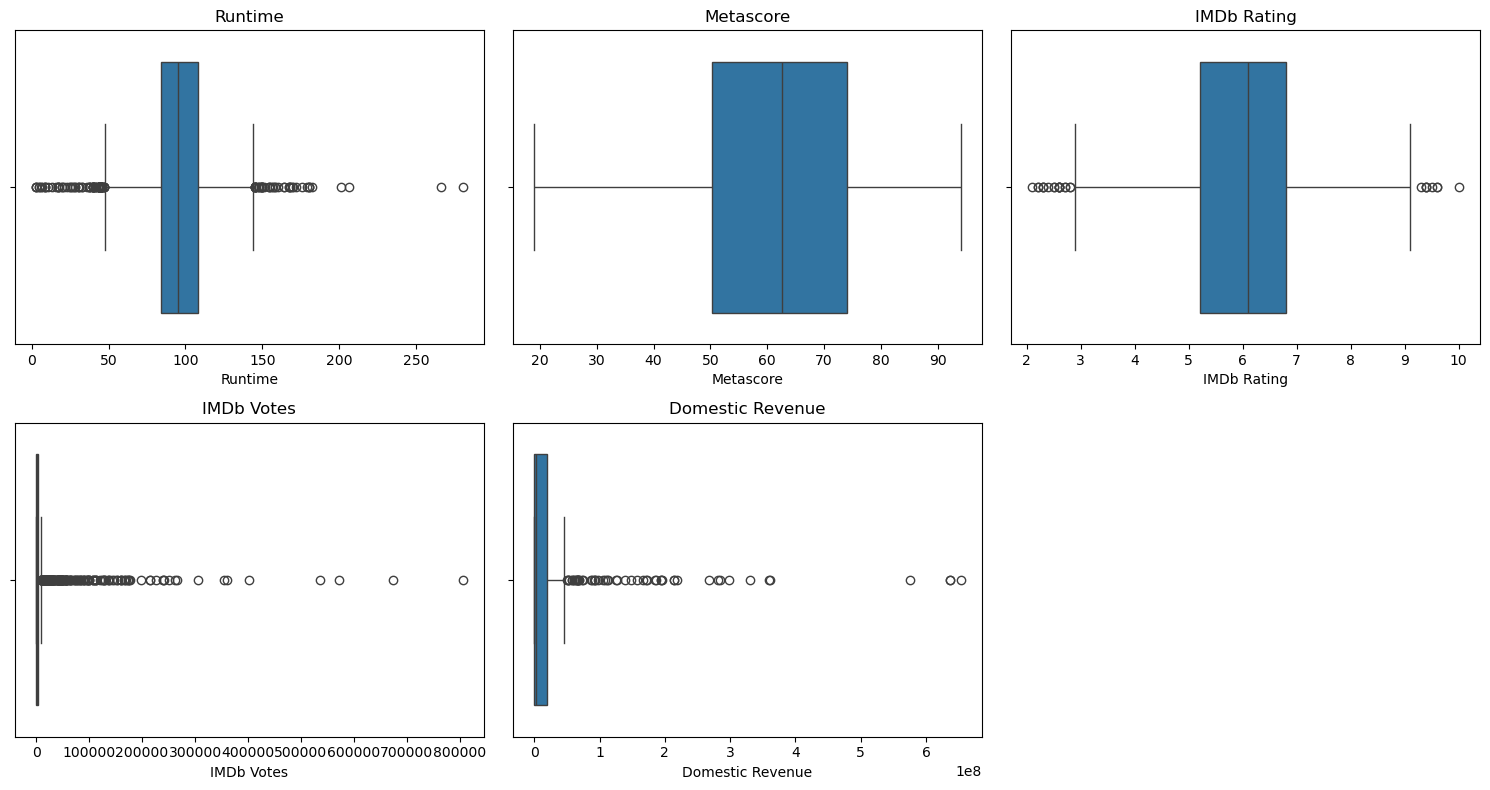

In [267]:
# Vẽ biểu đồ cho các giá trị 5 cột đầu
n_cols = 3  # số cột
n_rows = -(-len(numerical_columns[:5]) // n_cols)  # làm tròn lên để đủ số hàng

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_columns[:5]):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(col)

for j in range(len(numerical_columns[:5]), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

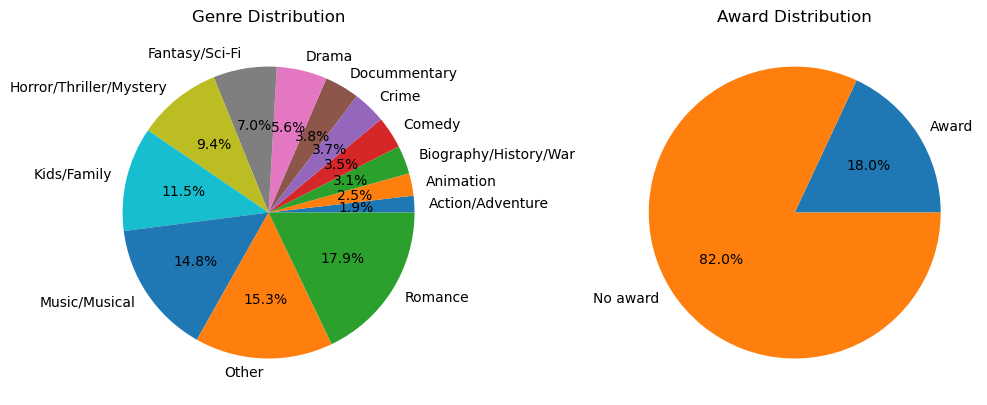

In [268]:
genre = numerical_columns[5:18]
totals = data[genre].sum().sort_values(ascending=True)

award = len(data[(data['Win'] > 0) & (data['Nomination'] > 0)])
no_award = len(data[(data['Win'] == 0) & (data['Nomination'] == 0)])
awards = [award, no_award]
label_award = ['Award', 'No award']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(totals, labels=genre, autopct='%1.1f%%', startangle=0)
plt.title('Genre Distribution')

plt.subplot(1, 2, 2)
plt.pie(awards, labels=label_award, autopct='%1.1f%%', startangle=0)
plt.title('Award Distribution')

plt.tight_layout()
plt.show()

#### 3.3.3 Xử lý dữ liệu lỗi hoặc bất thường

In [270]:
for column in numerical_columns:
    if num_col_info_df[column][0] > 75.00:
        data = data.drop(columns = [column])
        numerical_columns.remove(column)
#Runtime va IMDb Votes có số lượng ngoại lai đáng kể
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].mean())
data['IMDb Votes'] = data['IMDb Votes'].fillna(data['IMDb Votes'].mean())
#Runtime va IMDb Votes có số lượng ngoại lai không đáng kể
data['IMDb Rating'] = data['IMDb Rating'].fillna(data['IMDb Rating'].median())

/tmp/ipykernel_17148/3965614033.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if num_col_info_df[column][0] > 75.00:
/tmp/ipykernel_17148/3965614033.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if num_col_info_df[column][0] > 75.00:
/tmp/ipykernel_17148/3965614033.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if num_col_info_df[column][0] > 75.00:


#### 3.3.3 Chuẩn hóa dữ liệu nếu cần

### 3.4 Sự phân bố dữ liệu của các cột có kiểu định tính
Các cột có kiểu dữ liệu định tính

In [271]:
categorical_columns = data.select_dtypes(include=['object', 'bool', 'datetime64[ns]']).columns.tolist()
print('Categorical columns: ')
for col_name in categorical_columns:
    print(col_name)

Categorical columns: 
Title
Release time
Age rating
Language


#### 3.4.1 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

In [272]:
for col_name in categorical_columns:
    missing_rate = data[col_name].isnull().mean() * 100
    print(f'{col_name}: {missing_rate:.2f}%')

Title: 0.00%
Release time: 2.49%
Age rating: 0.00%
Language: 5.54%


Trong quá trình khám phá dữ liệu, đã phát hiện 2 cột định tính có giá trị bị thiếu. Cụ thể là cột **Release time**(2,49%) và **Language** (5,54%)

Để khắc phục vấn đề này
- Ở cột Release time, ta sẽ xóa luôn các giá trị thiếu này. Vì giá trị bị thiếu rất ít (2,49%) nên sẽ không ảnh hưởng đáng kể đến tổng thể dữ liệu
- Ở cột Language, điền giá trị phổ biến nhất (mode) vào những ô bị thiếu. Vì tỷ lệ giá trị thiếu chỉ có 5,54%, điền mode vừa giúp đảm bảo dữ liệu vẫn đầy đủ, vừa duy trì tính đại diện cho tập dữ liệu, hạn chế tối đa sai lệch phân phối các giá trị trong toàn bộ tập dữ liệu

In [273]:
# Xóa các hàng có giá trị thiếu trong cột Release time
data.dropna(subset=['Release time'], inplace=True)

# Điền giá trị phổ biến nhất vào những ô bị thiếu
mode_value = data['Language'].mode()[0]
data['Language'] = data['Language'].fillna(mode_value)

#### 3.4.2 Số giá trị phân biệt của mỗi cột

In [274]:
# Hàm tính toán sự phân bố các giá trị
def compute_distribution(dataframe, column):
    value_counts = dataframe[column].value_counts(dropna=False) 
    db = {}
    for value, count in value_counts.items():
        db[value] = count
    
    return db

In [275]:
# Tìm phân bố giá trị
cat_distribution = {}

for column in categorical_columns:
    cat_distribution[column] = compute_distribution(data, column)

In [276]:
# Chuyển thành dạng bảng
# Tạo danh sách để lưu dữ liệu cho DataFrame
df = {
    "Column": [],
    "Distinct_Values": [],
    "Value_Distribution": []
}

# Thêm dữ liệu vào danh sách
for column, distribution in cat_distribution.items():
    different_values = len(set(data[column]))
    df["Column"].append(column)
    df["Distinct_Values"].append(different_values)
    df["Value_Distribution"].append(distribution)

# Tạo DataFrame từ dữ liệu
distribution_df = pd.DataFrame(df)

# In ra DataFrame
distribution_df

,Column,Distinct_Values,Value_Distribution
0,Title,1719,"{'Horizon: An American Saga - Chapter 1': 2, '..."
1,Release time,557,"{2024-09-13 00:00:00: 17, 2024-10-18 00:00:00:..."
2,Age rating,5,"{'R': 798, 'PG-13': 450, 'PG': 273, 'G': 179, ..."
3,Language,165,"{'English': 1296, 'Spanish': 37, 'English, Spa..."


##### Trực quan hóa để thấy rõ sự phân bố giá trị

Vì cột title chứa các giá trị duy nhất (mỗi tên khác nhau), việc vẽ biểu đồ không mang lại nhiều ý nghĩa. Vì vậy, chỉ trực quan hóa 3 cột là **Release time** với đại diện là các năm, **Age rating**  và **Language** với 10 ngôn ngữ phổ biến nhất để thấy sự phân phối dữ liệu.

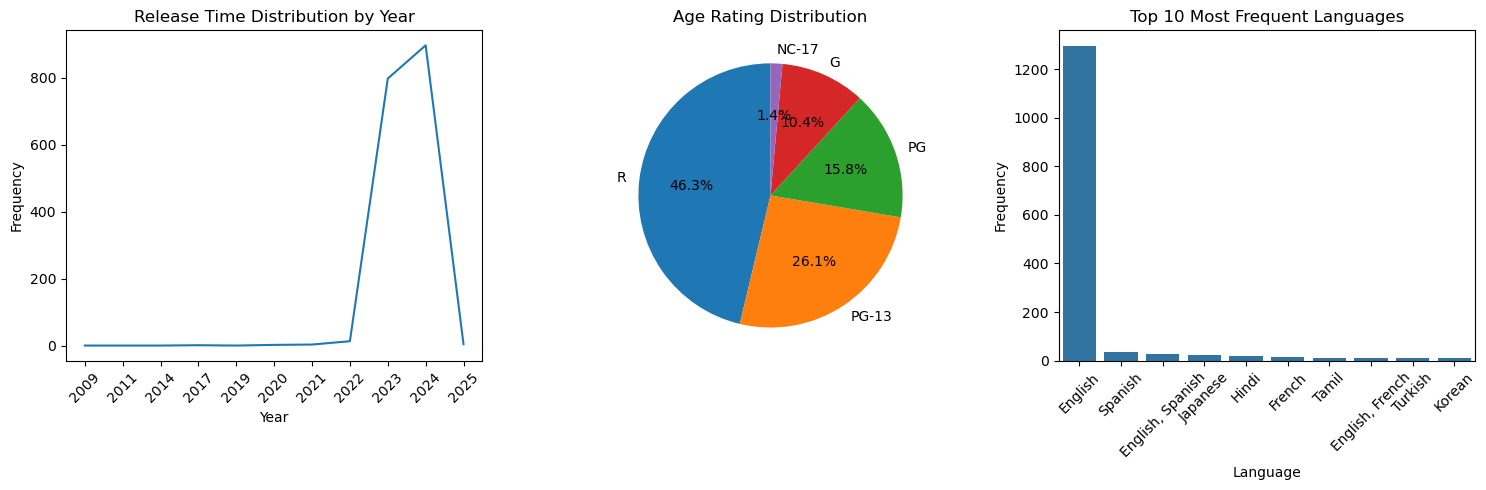

In [277]:
# Vẽ biểu đồ phân bố giá trị của các cột
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Biểu đồ Release time (chọn tần suất phát hành theo năm)
data['Release_month'] = data['Release time'].dt.to_period('Y')
# Đếm số lượng bản phát hành mỗi năm
release_counts = data['Release_month'].value_counts().sort_index()

sns.lineplot(x=release_counts.index.astype(str), y=release_counts.values, ax=axes[0])
axes[0].set_title("Release Time Distribution by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis='x', rotation=45)

data.drop(columns=['Release_month'], inplace=True)

# Biểu đồ Age rating
# Đếm số lượng các giá trị age rating
age_rating_counts = data['Age rating'].value_counts()
axes[1].pie(age_rating_counts, labels=age_rating_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Age Rating Distribution")

# Biểu đồ Language (Top 10 languages)
top_languages = data['Language'].value_counts().head(10)
sns.barplot(x=top_languages.index, y=top_languages.values, ax=axes[2])
axes[2].set_title("Top 10 Most Frequent Languages")
axes[2].set_xlabel("Language")
axes[2].set_ylabel("Frequency")
axes[2].tick_params(axis='x', rotation=45)

# Hiển thị tất cả biểu đồ
plt.tight_layout()
plt.show()

#### 3.4.3 Xử lý dữ liệu bất thường

Qua xử lý giá trị thiếu và trực quan sự phân bố các giá trị ở trên, các cột không còn dữ liệu bất thường

#### 3.4.4 Xử lý dữ liệu phân loại

Cột **Age Rating** có dữ liệu object, ta sẽ thêm một cột mới là **Age Rating Quantification** để chuyển đổi thành các giá trị số là kiểu dữ liệu phân loại để dễ dàng phân tích và sử dụng trong mô hình máy học

In [278]:
# Tạo một từ điển để chuyển đổi giá trị
rating_map = {
    'NC-17': 5,
    'R': 4,
    'PG-13': 3,
    'PG': 2,
    'G': 1
}

data['Age rating quantification'] = pd.Categorical(data['Age rating'].map(rating_map))

## Sau các bước tiền xử lý

Số hàng, số cột của dữ liệu:

In [279]:
data.shape

(1725, 23)

Các cột có ý nghĩa như sau:
|Tên cột|Ý nghĩa|
|-------|-------|
| Title| Tên của bộ phim|
| Realease time| Thời gian phát hành của bộ phim|
| Age rating| Đánh giá độ tuổi phù hợp để xem phim|
| Runtime| Thời lượng của bộ phim|
| Genre| Thể loại của bộ phim|
| Language| Ngôn ngữ chính được sử dụng trong bộ phim|
| IMDb Rating| Điểm đánh giá của bộ phim trên IMDb|
| IMDb Votes| Số lượt bình chọn của người dùng trên IMDb|
| Domestic Revenue| Doanh thu nội địa|
| Action/Adventure| Phim thuộc thể loại hành động hoặc phiêu lưu|
| Animation| Phim hoạt hình|
| Biography/History/War| Phim thuộc thể loại tiểu sử, lịch sử, hoặc chiến tranh|
| Comedy| Phim hài|
| Crime| Phim thuộc thể loại hình sự |
| Docummentary| Phim tài liệu|
| Drama| Phim chính kịch|
| Fantasy/Sci-Fi| Phim thuộc thể loại giả tưởng hoặc khoa học viễn tưởng|
| Horror/Thriller/Mystery| Phim thuộc thể loại kinh dị, hồi hộp, hoặc bí ẩn|
| Kids/Family| Phim dành cho trẻ em hoặc gia đình|
| Music/Musical| Phim âm nhạc hoặc nhạc kịch|
| Other| Các thể loại phim khác|
| Romance| Phim thuộc thể loại lãng mạn|
| Win | Số lượng giải phim đạt được |
| Nomination| Số lần phim được đề cử |
| Age rating quantification| Đánh giá định lượng cho độ tuổi phù hợp để xem phim|


Kiểu dữ liệu của các cột

In [280]:
data.dtypes

Title                                object
Release time                 datetime64[ns]
Age rating                           object
Runtime                             float64
Language                             object
IMDb Rating                         float64
IMDb Votes                          float64
Action/Adventure                      int64
Animation                             int64
Biography/History/War                 int64
Comedy                                int64
Crime                                 int64
Docummentary                          int64
Drama                                 int64
Fantasy/Sci-Fi                        int64
Horror/Thriller/Mystery               int64
Kids/Family                           int64
Music/Musical                         int64
Other                                 int64
Romance                               int64
Win                                 float64
Nomination                          float64
Age rating quantification       

Thực hiện lưu dữ liệu này vào 1 tệp mới và thực hiện phân tích trên tệp này.

In [281]:
data.to_csv('../IntroToDS/Data/movie_data.csv', index=False)

OSError: Cannot save file into a non-existent directory: '../IntroToDS/Data'